In [169]:
ff=!pwd
print(ff[0]+"/NHID_clustering-Copy_blink.ipynb")

/data/hdd-bravo/user01_dir/project_codes/2023/09/clustering_with_NHIS_data/NHID_clustering-Copy_blink.ipynb


In [170]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import copy
from collections import Counter
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.decomposition import PCA
from kmodes.kprototypes import KPrototypes

In [171]:
DATA_PATH='/data/hdd-bravo/user01_dir/project_codes/2023/09/clustering_with_NHIS_data/data/blinkdb_tab.csv'
SEED=0

In [172]:
np.random.seed(SEED)

In [173]:
def count_null(df):
  number_of_rows_from_data=df.shape[0]
  number_of_columns_from_data=df.shape[1]

  number_of_nan_in_column=df.isnull().sum(axis=0)
  number_of_nan_in_row=df.isnull().sum(axis=1)
  print('결측값 실제 개수 (n)\n',number_of_nan_in_column)
  print('\n결측값 비율 (%)\n',number_of_nan_in_column/number_of_rows_from_data*100)
  return number_of_nan_in_column/number_of_rows_from_data*100

In [174]:
health_exam_df=pd.read_csv(DATA_PATH,encoding='utf-8',sep='\t')

/tmp/ipykernel_5878/102082478.py:1: DtypeWarning: Columns (7,11) have mixed types. Specify dtype option on import or set low_memory=False.
  health_exam_df=pd.read_csv(DATA_PATH,encoding='utf-8',sep='\t')


In [86]:
health_exam_df

,gender,created_at,birthday,alt,ast,creatinine,e_gfr,fasting_glucose,fasting_glucose_result,gamma_gtp,...,exercise_status,level_of_nicotine_dependence,now_drug_treatment,nutrition_status,obesity_status,past_disease_history,recommendations_for_life_style,smoker_category,drug_treatment,urine_protein
0,1,2019-12-14 01:24:48,1979-12-26,19,31,0.6,110,80,정상,27,...,"* 신체활동부족, * 근력운동부족",미선택,NaN,양호,미선택,NaN,NaN,미선택,NaN,정상
1,0,2019-12-14 01:26:00,1967-03-13,22,26,0.7,118,103,공복혈당장애의심,28,...,NaN,NaN,무,NaN,NaN,무,* 금연필요,NaN,NaN,정상
2,1,2019-12-14 01:27:22,1989-04-11,11,24,0.5,144,82,정상,16,...,NaN,NaN,무,NaN,NaN,무,미선택,NaN,NaN,정상
3,1,2019-12-14 01:27:47,1981-02-05,35,38,0.5,138,73,정상,27,...,NaN,NaN,무,NaN,NaN,무,"* 절주 필요, * 신체활동 필요, * 근력운동 필요",NaN,NaN,정상
4,0,2019-12-14 01:28:44,1973-11-01,66,52,1,80,99,유질환자,43,...,NaN,NaN,유,NaN,NaN,유,"* 절주 필요, * 신체활동 필요, * 근력운동 필요",NaN,NaN,정상
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23040,1,2020-08-14 19:26:44,1962-08-01,11,39,0.8,78,99.0,정상,14,...,NaN,NaN,무,NaN,NaN,무,* 근력운동필요,NaN,NaN,정상
23041,1,2020-08-14 19:27:13,1957-04-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23042,1,2020-08-14 19:27:42,1984-02-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23043,0,2020-08-14 19:28:42,1992-10-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Add age column

In [95]:
health_exam_df["age"]=pd.to_numeric(health_exam_df['created_at'].str[:4],errors='coerce')-pd.to_numeric(health_exam_df['birthday'].str[:4],errors='coerce')

In [96]:
health_exam_df=health_exam_df.drop(columns=['created_at','birthday'])

# 결측값 확인, 위: 실제 결측값 수, 아래: 결측값 비율 (%)

In [100]:
missing_ratio_result=count_null(health_exam_df)

결측값 실제 개수 (n)
 gender                                38
alt                                 7258
ast                                 7317
creatinine                          7434
e_gfr                               7729
fasting_glucose                     7433
fasting_glucose_result              7452
gamma_gtp                           7432
hdl_cholesterol                     7266
hemoglobin                          7431
hemoglobin_result                   7427
ldl_cholesterol                     7271
lipid_result                       15498
liver_disease_result                7423
renal_disease_result                7468
total_cholesterol                   8063
triglyceride                        7359
existing_disease                   15712
final_interpretation                8981
how_life_habit_management          10163
other_comments                     11591
suspicious_disease                 13817
blood_pressure_result              10098
bmi                                10050
d

In [101]:
high_missing_ratio_variables=list(missing_ratio_result[missing_ratio_result>50].index)
high_missing_ratio_variables

['lipid_result',
 'existing_disease',
 'other_comments',
 'suspicious_disease',
 'cognitive_impairment_result',
 'depressive_disorder_result',
 'drinking_category',
 'exercise_status',
 'level_of_nicotine_dependence',
 'nutrition_status',
 'obesity_status',
 'recommendations_for_life_style',
 'smoker_category',
 'drug_treatment']

# 결측값 많은 변수 제거

In [103]:
joint_data_wo_high_missing_ratio_variables=health_exam_df.drop(columns=high_missing_ratio_variables)
joint_data_wo_high_missing_ratio_variables

,gender,alt,ast,creatinine,e_gfr,fasting_glucose,fasting_glucose_result,gamma_gtp,hdl_cholesterol,hemoglobin,...,waist_circumference,waist_circumference_result,weight,bmi_result,cognitive_impairment_inspection,depressive_disorder_inspection,now_drug_treatment,past_disease_history,urine_protein,age
0,1,19,31,0.6,110,80,정상,27,69,12.6,...,64.0,정상,45.5,정상 (18.5-24.9),비해당,해당,NaN,NaN,정상,40.0
1,0,22,26,0.7,118,103,공복혈당장애의심,28,31,14.6,...,80.0,정상,78.3,정상 (18.5-24.9),비해당,비해당,무,무,정상,52.0
2,1,11,24,0.5,144,82,정상,16,비해당,11.5,...,77.0,정상,59.7,정상 (18.5-24.9),비해당,해당,무,무,정상,30.0
3,1,35,38,0.5,138,73,정상,27,비해당,13.2,...,78.0,정상,60.4,정상 (18.5-24.9),비해당,비해당,무,무,정상,38.0
4,0,66,52,1,80,99,유질환자,43,비해당,15.8,...,94.0,"복부비만(남 90이상,여 85이상)",84.7,과체중 (25-29.9),비해당,비해당,유,유,정상,46.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23040,1,11,39,0.8,78,99.0,정상,14,비해당,13.1,...,80.0,정상,55.4,정상(18.5~24.9),비해당,비해당,무,무,정상,58.0
23041,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63.0
23042,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36.0
23043,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.0


In [104]:
missing_ratio_result=count_null(joint_data_wo_high_missing_ratio_variables)

결측값 실제 개수 (n)
 gender                                38
alt                                 7258
ast                                 7317
creatinine                          7434
e_gfr                               7729
fasting_glucose                     7433
fasting_glucose_result              7452
gamma_gtp                           7432
hdl_cholesterol                     7266
hemoglobin                          7431
hemoglobin_result                   7427
ldl_cholesterol                     7271
liver_disease_result                7423
renal_disease_result                7468
total_cholesterol                   8063
triglyceride                        7359
final_interpretation                8981
how_life_habit_management          10163
blood_pressure_result              10098
bmi                                10050
diastolic_blood_pressure            9269
hearing_left                        8975
hearing_result                      9849
hearing_right                      10018
h

# 특정 변수들에 결측값 있는 row 제거

In [107]:
df_cleaned=joint_data_wo_high_missing_ratio_variables.dropna(subset=['alt','ast','creatinine','e_gfr','triglyceride','blood_pressure_result','how_life_habit_management','age'])
df_cleaned

,gender,alt,ast,creatinine,e_gfr,fasting_glucose,fasting_glucose_result,gamma_gtp,hdl_cholesterol,hemoglobin,...,waist_circumference,waist_circumference_result,weight,bmi_result,cognitive_impairment_inspection,depressive_disorder_inspection,now_drug_treatment,past_disease_history,urine_protein,age
0,1,19,31,0.6,110,80,정상,27,69,12.6,...,64.0,정상,45.5,정상 (18.5-24.9),비해당,해당,NaN,NaN,정상,40.0
1,0,22,26,0.7,118,103,공복혈당장애의심,28,31,14.6,...,80.0,정상,78.3,정상 (18.5-24.9),비해당,비해당,무,무,정상,52.0
2,1,11,24,0.5,144,82,정상,16,비해당,11.5,...,77.0,정상,59.7,정상 (18.5-24.9),비해당,해당,무,무,정상,30.0
3,1,35,38,0.5,138,73,정상,27,비해당,13.2,...,78.0,정상,60.4,정상 (18.5-24.9),비해당,비해당,무,무,정상,38.0
4,0,66,52,1,80,99,유질환자,43,비해당,15.8,...,94.0,"복부비만(남 90이상,여 85이상)",84.7,과체중 (25-29.9),비해당,비해당,유,유,정상,46.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23034,1,17,13,1.1,54,80.0,정상,20,비해당,15.3,...,74.0,정상,56.3,정상(18.5~24.9),비해당,비해당,유,유,경계,58.0
23035,1,11,10,1.1,55,83.0,정상,13,비해당,13.4,...,77.0,정상,52.2,정상(18.5~24.9),비해당,해당,무,무,정상,50.0
23036,0,32,14,1.2,68,91.0,정상,12,비해당,16.7,...,85.0,정상,81.9,과체중(25~29.9),비해당,해당,무,무,정상,50.0
23037,1,16,20,0.8,78,98.0,정상,13,87,14.8,...,67.0,정상,47.0,정상(18.5~24.9),비해당,비해당,무,무,정상,56.0


In [108]:
missing_ratio_result=count_null(df_cleaned)

결측값 실제 개수 (n)
 gender                               0
alt                                  0
ast                                  0
creatinine                           0
e_gfr                                0
fasting_glucose                      0
fasting_glucose_result              24
gamma_gtp                            1
hdl_cholesterol                      0
hemoglobin                           1
hemoglobin_result                    2
ldl_cholesterol                      3
liver_disease_result                 1
renal_disease_result                 1
total_cholesterol                    0
triglyceride                         0
final_interpretation                60
how_life_habit_management            0
blood_pressure_result                0
bmi                                 23
diastolic_blood_pressure             0
hearing_left                         0
hearing_result                       3
hearing_right                        0
height                               0
systolic_b

# 변수 분류

In [109]:
numerical_variables=["age","gender","alt","ast","creatinine","e_gfr","fasting_glucose","gamma_gtp","hemoglobin","bmi","diastolic_blood_pressure","height","systolic_blood_pressure","waist_circumference","weight"]
categorical_variables=["now_drug_treatment","past_disease_history","urine_protein"]
needless_variables=["final_interpretation","fasting_glucose_result","hdl_cholesterol","hemoglobin_result","ldl_cholesterol","liver_disease_result","renal_disease_result","total_cholesterol","triglyceride","how_life_habit_management","blood_pressure_result","hearing_left","hearing_result","hearing_right","vision_correction","vision_left","vision_right","waist_circumference_result","bmi_result","cognitive_impairment_inspection","depressive_disorder_inspection"]

# 불필요한 column 제거

In [110]:
df_cleaned_wo_needless_columns=df_cleaned.drop(needless_variables,axis=1)
df_cleaned_wo_needless_columns

,gender,alt,ast,creatinine,e_gfr,fasting_glucose,gamma_gtp,hemoglobin,bmi,diastolic_blood_pressure,height,systolic_blood_pressure,waist_circumference,weight,now_drug_treatment,past_disease_history,urine_protein,age
0,1,19,31,0.6,110,80,27,12.6,18.6,87,156.5,124,64.0,45.5,NaN,NaN,정상,40.0
1,0,22,26,0.7,118,103,28,14.6,24.0,75,180.7,118,80.0,78.3,무,무,정상,52.0
2,1,11,24,0.5,144,82,16,11.5,23.2,54,160.4,110,77.0,59.7,무,무,정상,30.0
3,1,35,38,0.5,138,73,27,13.2,23.4,105,160.8,150,78.0,60.4,무,무,정상,38.0
4,0,66,52,1,80,99,43,15.8,27.5,98,175.5,146,94.0,84.7,유,유,정상,46.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23034,1,17,13,1.1,54,80.0,20,15.3,24.0,100,153.3,171,74.0,56.3,유,유,경계,58.0
23035,1,11,10,1.1,55,83.0,13,13.4,21.0,63,157.6,101,77.0,52.2,무,무,정상,50.0
23036,0,32,14,1.2,68,91.0,12,16.7,26.9,90,174.4,140,85.0,81.9,무,무,정상,50.0
23037,1,16,20,0.8,78,98.0,13,14.8,19.1,55,156.7,125,67.0,47.0,무,무,정상,56.0


# 연속형변수를 integer or float type으로 변경

In [111]:
for one_numerical_column in numerical_variables:
    df_cleaned_wo_needless_columns[one_numerical_column]=pd.to_numeric(df_cleaned_wo_needless_columns[one_numerical_column],errors='coerce')
    df_cleaned_wo_needless_columns=df_cleaned_wo_needless_columns.dropna(subset=[one_numerical_column])
df_cleaned_wo_needless_columns

,gender,alt,ast,creatinine,e_gfr,fasting_glucose,gamma_gtp,hemoglobin,bmi,diastolic_blood_pressure,height,systolic_blood_pressure,waist_circumference,weight,now_drug_treatment,past_disease_history,urine_protein,age
0,1,19,31,0.6,110,80.0,27.0,12.6,18.6,87,156.5,124,64.0,45.5,NaN,NaN,정상,40.0
1,0,22,26,0.7,118,103.0,28.0,14.6,24.0,75,180.7,118,80.0,78.3,무,무,정상,52.0
2,1,11,24,0.5,144,82.0,16.0,11.5,23.2,54,160.4,110,77.0,59.7,무,무,정상,30.0
3,1,35,38,0.5,138,73.0,27.0,13.2,23.4,105,160.8,150,78.0,60.4,무,무,정상,38.0
4,0,66,52,1.0,80,99.0,43.0,15.8,27.5,98,175.5,146,94.0,84.7,유,유,정상,46.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23034,1,17,13,1.1,54,80.0,20.0,15.3,24.0,100,153.3,171,74.0,56.3,유,유,경계,58.0
23035,1,11,10,1.1,55,83.0,13.0,13.4,21.0,63,157.6,101,77.0,52.2,무,무,정상,50.0
23036,0,32,14,1.2,68,91.0,12.0,16.7,26.9,90,174.4,140,85.0,81.9,무,무,정상,50.0
23037,1,16,20,0.8,78,98.0,13.0,14.8,19.1,55,156.7,125,67.0,47.0,무,무,정상,56.0


# 범주형 데이터 확인

In [112]:
print(df_cleaned_wo_needless_columns['now_drug_treatment'].unique())
print(df_cleaned_wo_needless_columns['past_disease_history'].unique())
print(df_cleaned_wo_needless_columns['urine_protein'].unique())

[nan '무' '유']
[nan '무' '유']
['정상' '단백뇨 의심' '경계' '1' '0' '2' '단백뇨의심' nan]


# urine_protein column preprocessing

In [113]:
print(df_cleaned_wo_needless_columns['urine_protein'].value_counts())

urine_protein
정상        10346
경계          617
단백뇨의심       374
단백뇨 의심       67
0             9
1             8
2             3
Name: count, dtype: int64


In [114]:
df_cleaned_wo_needless_columns['urine_protein'].replace({"단백뇨 의심":'단백뇨의심',"0":'정상',"1":'경계',"2":'단백뇨의심'}, inplace=True)

print(df_cleaned_wo_needless_columns['urine_protein'].value_counts())

urine_protein
정상       10355
경계         625
단백뇨의심      444
Name: count, dtype: int64


# 결측값 확인

In [115]:
missing_ratio_result=count_null(df_cleaned_wo_needless_columns)

결측값 실제 개수 (n)
 gender                        0
alt                           0
ast                           0
creatinine                    0
e_gfr                         0
fasting_glucose               0
gamma_gtp                     0
hemoglobin                    0
bmi                           0
diastolic_blood_pressure      0
height                        0
systolic_blood_pressure       0
waist_circumference           0
weight                        0
now_drug_treatment          485
past_disease_history        484
urine_protein                20
age                           0
dtype: int64

결측값 비율 (%)
 gender                      0.000000
alt                         0.000000
ast                         0.000000
creatinine                  0.000000
e_gfr                       0.000000
fasting_glucose             0.000000
gamma_gtp                   0.000000
hemoglobin                  0.000000
bmi                         0.000000
diastolic_blood_pressure    0.000000
height       

# 결측값 Imputation

In [116]:
joint_data_w_imputation=copy.deepcopy(df_cleaned_wo_needless_columns)

imputation_target_variables=['now_drug_treatment','past_disease_history','urine_protein']

for one_imputation_target_variable in imputation_target_variables:
    category_frequencies=joint_data_w_imputation[one_imputation_target_variable].value_counts(normalize=True)
    samples=np.random.choice(category_frequencies.index,p=category_frequencies.values,size=joint_data_w_imputation[one_imputation_target_variable].isnull().sum())
    joint_data_w_imputation.loc[joint_data_w_imputation[one_imputation_target_variable].isnull(),one_imputation_target_variable]=samples

# 결측값 확인

In [117]:
missing_ratio_result=count_null(joint_data_w_imputation)

결측값 실제 개수 (n)
 gender                      0
alt                         0
ast                         0
creatinine                  0
e_gfr                       0
fasting_glucose             0
gamma_gtp                   0
hemoglobin                  0
bmi                         0
diastolic_blood_pressure    0
height                      0
systolic_blood_pressure     0
waist_circumference         0
weight                      0
now_drug_treatment          0
past_disease_history        0
urine_protein               0
age                         0
dtype: int64

결측값 비율 (%)
 gender                      0.0
alt                         0.0
ast                         0.0
creatinine                  0.0
e_gfr                       0.0
fasting_glucose             0.0
gamma_gtp                   0.0
hemoglobin                  0.0
bmi                         0.0
diastolic_blood_pressure    0.0
height                      0.0
systolic_blood_pressure     0.0
waist_circumference         0.0
wei

In [118]:
joint_data_w_imputation

,gender,alt,ast,creatinine,e_gfr,fasting_glucose,gamma_gtp,hemoglobin,bmi,diastolic_blood_pressure,height,systolic_blood_pressure,waist_circumference,weight,now_drug_treatment,past_disease_history,urine_protein,age
0,1,19,31,0.6,110,80.0,27.0,12.6,18.6,87,156.5,124,64.0,45.5,무,무,정상,40.0
1,0,22,26,0.7,118,103.0,28.0,14.6,24.0,75,180.7,118,80.0,78.3,무,무,정상,52.0
2,1,11,24,0.5,144,82.0,16.0,11.5,23.2,54,160.4,110,77.0,59.7,무,무,정상,30.0
3,1,35,38,0.5,138,73.0,27.0,13.2,23.4,105,160.8,150,78.0,60.4,무,무,정상,38.0
4,0,66,52,1.0,80,99.0,43.0,15.8,27.5,98,175.5,146,94.0,84.7,유,유,정상,46.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23034,1,17,13,1.1,54,80.0,20.0,15.3,24.0,100,153.3,171,74.0,56.3,유,유,경계,58.0
23035,1,11,10,1.1,55,83.0,13.0,13.4,21.0,63,157.6,101,77.0,52.2,무,무,정상,50.0
23036,0,32,14,1.2,68,91.0,12.0,16.7,26.9,90,174.4,140,85.0,81.9,무,무,정상,50.0
23037,1,16,20,0.8,78,98.0,13.0,14.8,19.1,55,156.7,125,67.0,47.0,무,무,정상,56.0


# 범주형 데이터를 숫자로 변환

In [120]:
joint_data_w_imputation['now_drug_treatment'].replace({"무":0,"유":1},inplace=True)
joint_data_w_imputation['past_disease_history'].replace({"무":0,"유":1},inplace=True)
joint_data_w_imputation['urine_protein'].replace({"정상":0,"경계":1,"단백뇨의심":2},inplace=True)

print(joint_data_w_imputation['now_drug_treatment'].unique())
print(joint_data_w_imputation['past_disease_history'].unique())
print(joint_data_w_imputation['urine_protein'].unique())

[0 1]
[0 1]
[0 2 1]


In [121]:
joint_data_w_imputation

,gender,alt,ast,creatinine,e_gfr,fasting_glucose,gamma_gtp,hemoglobin,bmi,diastolic_blood_pressure,height,systolic_blood_pressure,waist_circumference,weight,now_drug_treatment,past_disease_history,urine_protein,age
0,1,19,31,0.6,110,80.0,27.0,12.6,18.6,87,156.5,124,64.0,45.5,0,0,0,40.0
1,0,22,26,0.7,118,103.0,28.0,14.6,24.0,75,180.7,118,80.0,78.3,0,0,0,52.0
2,1,11,24,0.5,144,82.0,16.0,11.5,23.2,54,160.4,110,77.0,59.7,0,0,0,30.0
3,1,35,38,0.5,138,73.0,27.0,13.2,23.4,105,160.8,150,78.0,60.4,0,0,0,38.0
4,0,66,52,1.0,80,99.0,43.0,15.8,27.5,98,175.5,146,94.0,84.7,1,1,0,46.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23034,1,17,13,1.1,54,80.0,20.0,15.3,24.0,100,153.3,171,74.0,56.3,1,1,1,58.0
23035,1,11,10,1.1,55,83.0,13.0,13.4,21.0,63,157.6,101,77.0,52.2,0,0,0,50.0
23036,0,32,14,1.2,68,91.0,12.0,16.7,26.9,90,174.4,140,85.0,81.9,0,0,0,50.0
23037,1,16,20,0.8,78,98.0,13.0,14.8,19.1,55,156.7,125,67.0,47.0,0,0,0,56.0


# 변수 선택 (연속형, 범주형)
### Ordinal은 numerical 로 간주함
### 참고 : 
### https://github.com/nicodv/kmodes/issues/102
### https://github.com/Ekeany/Clustering-Mixed-Data/blob/main/Notebooks/Heart_cluster.ipynb

In [122]:
required_numerical_variables=["age","alt","ast","creatinine","e_gfr","fasting_glucose","gamma_gtp","hemoglobin","bmi","diastolic_blood_pressure","height","systolic_blood_pressure","waist_circumference","weight"]
required_categorical_variables=["gender","now_drug_treatment","past_disease_history","urine_protein"]

df_numerical=joint_data_w_imputation[required_numerical_variables]
df_categorical=joint_data_w_imputation[required_categorical_variables]
df_integrative=joint_data_w_imputation[required_numerical_variables+required_categorical_variables]

# 연속형 변수들 데이터 분포 확인

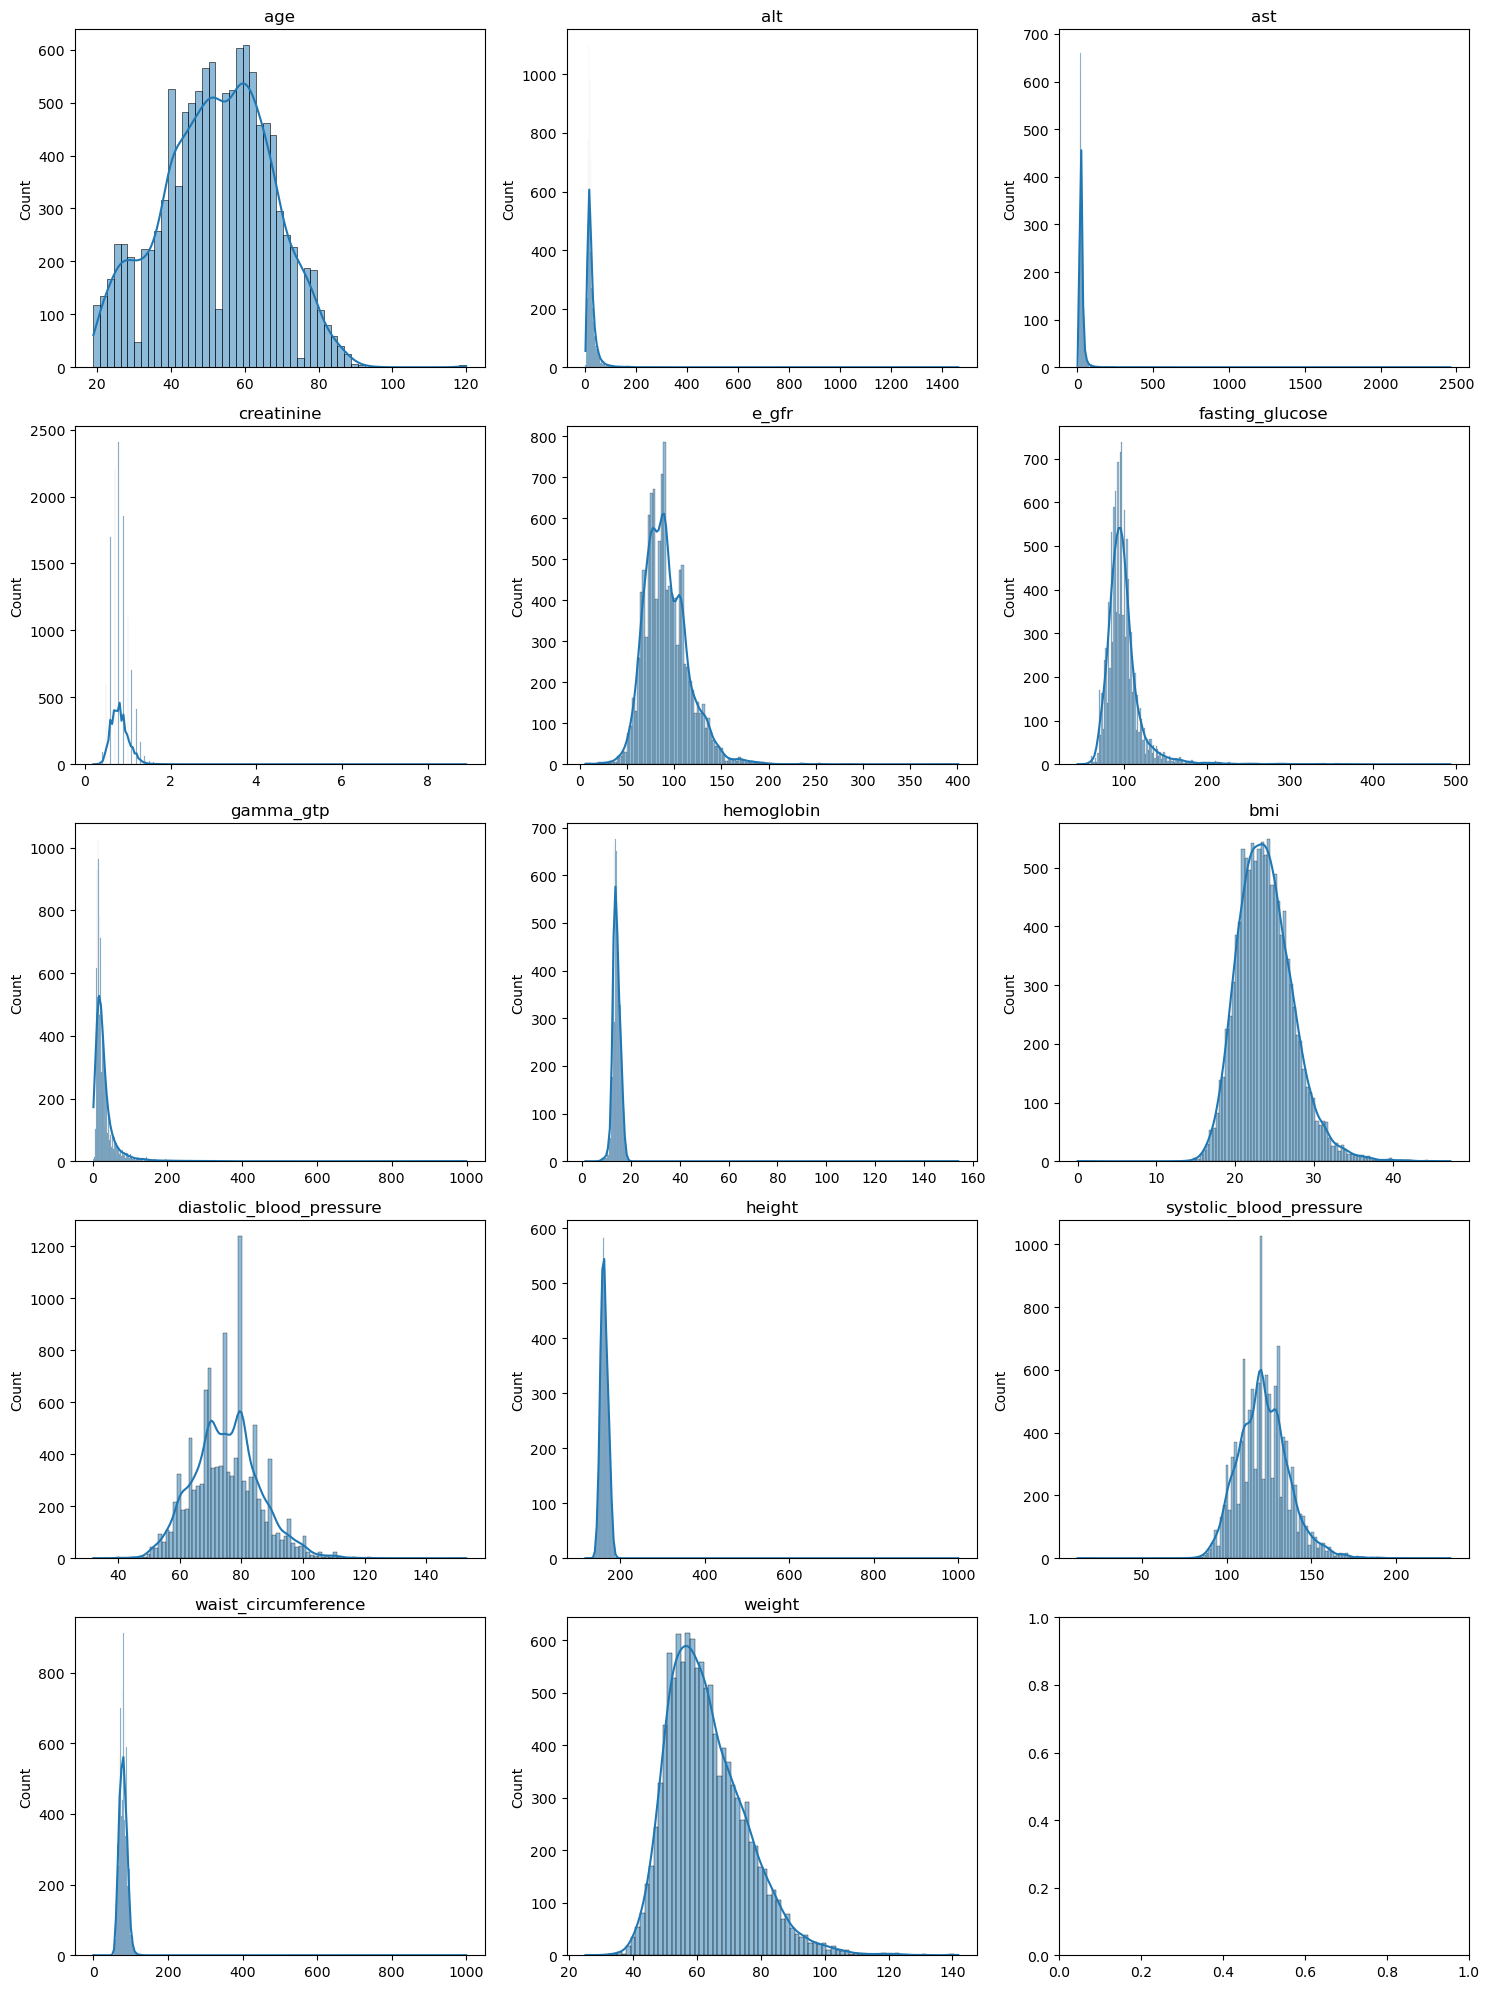

In [124]:
fig,axes=plt.subplots(5,3,figsize=(15,20))
axes=axes.flatten()

for i, column in enumerate(required_numerical_variables):
  sns.histplot(df_numerical[column],kde=True,ax=axes[i])
  axes[i].set_title(column)
  axes[i].set_xlabel('')
plt.tight_layout()
plt.show()

# 연속형 변수들을 정규화함 (standardization 방식 적용)
## 참고: https://yaeyang0629.tistory.com/entry/머신러닝파이썬K-means-clustering

In [125]:
standard_scaler=StandardScaler()
standard_scaler.fit(df_numerical)
health_exam_df_standardized=standard_scaler.transform(df_numerical)
health_exam_df_standardized

array([[-0.83749122, -0.24777333,  0.10088553, ...,  0.14569997,
        -1.17214532, -1.43816095],
       [-0.03027757, -0.14112813, -0.06421772, ..., -0.25881008,
         0.01891606,  1.23205868],
       [-1.51016927, -0.53216051, -0.13025903, ..., -0.79815681,
        -0.20440795, -0.28215123],
       ...,
       [-0.16481317,  0.21435584, -0.46046554, ...,  1.22439342,
         0.39112274,  1.52513157],
       [ 0.23879365, -0.35441852, -0.26234163, ...,  0.21311831,
        -0.94882131, -1.31604725],
       [ 0.37332926, -0.53216051,  0.36505075, ..., -0.86557515,
         0.01891606, -0.63221051]])

# 연속형 변수 데이터와 범주형 변수 데이터 결합

In [126]:
print(health_exam_df_standardized.shape,np.array(df_categorical).shape)
merged_array=np.hstack((health_exam_df_standardized,np.array(df_categorical)))
merged_array.shape

(11444, 14) (11444, 4)


(11444, 18)

# K-prototype clustering 수행

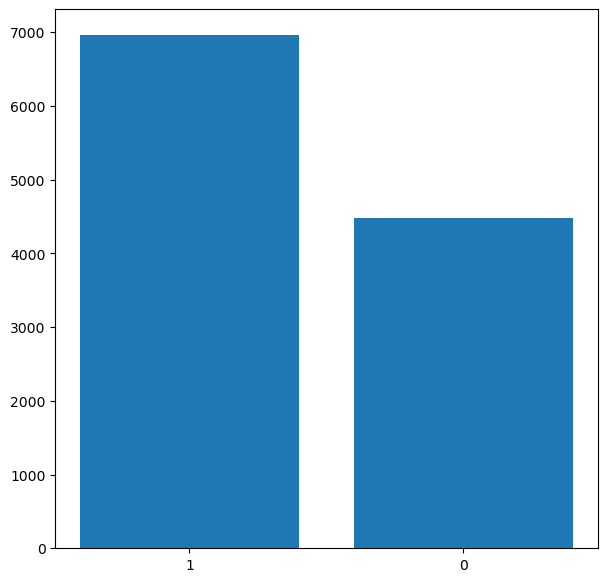

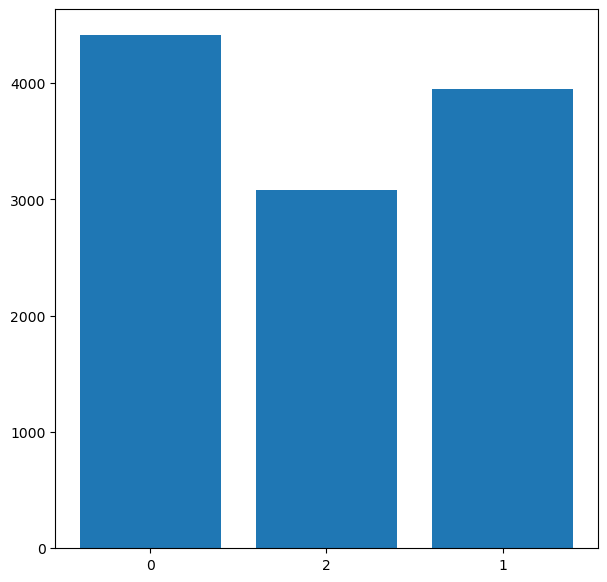

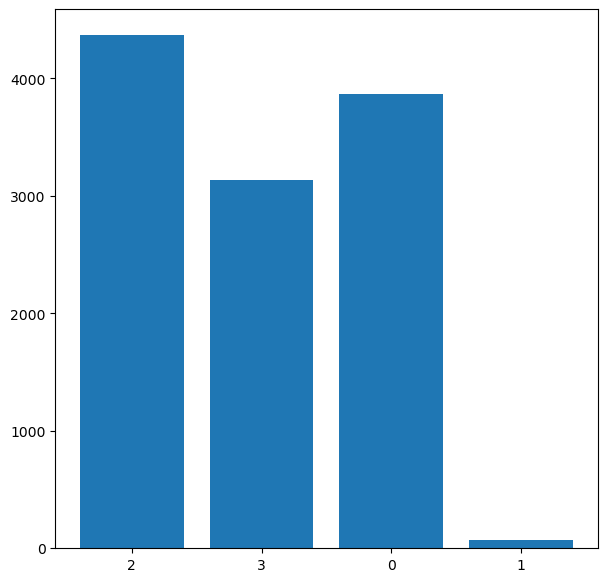

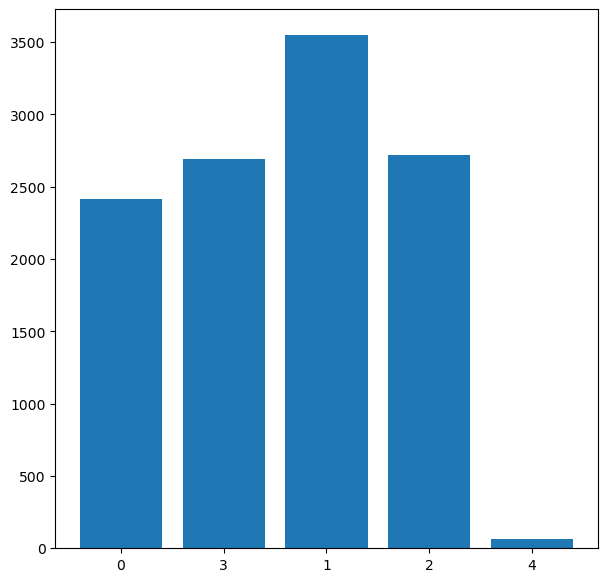

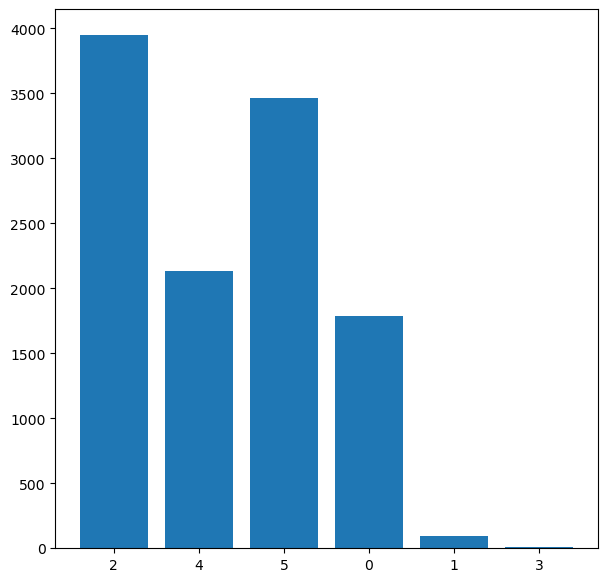

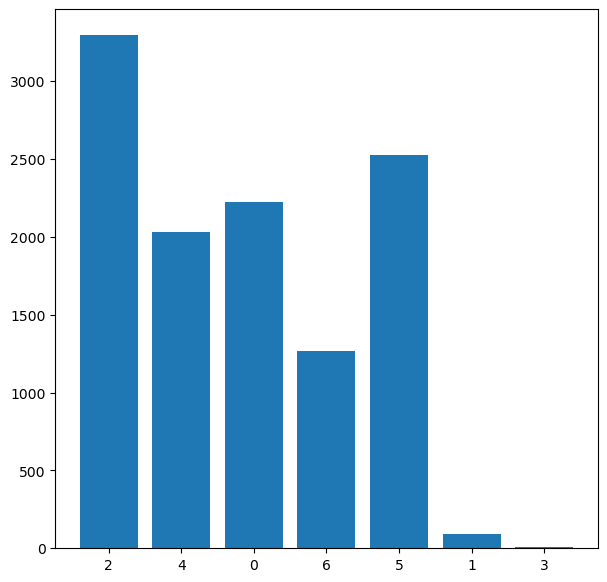

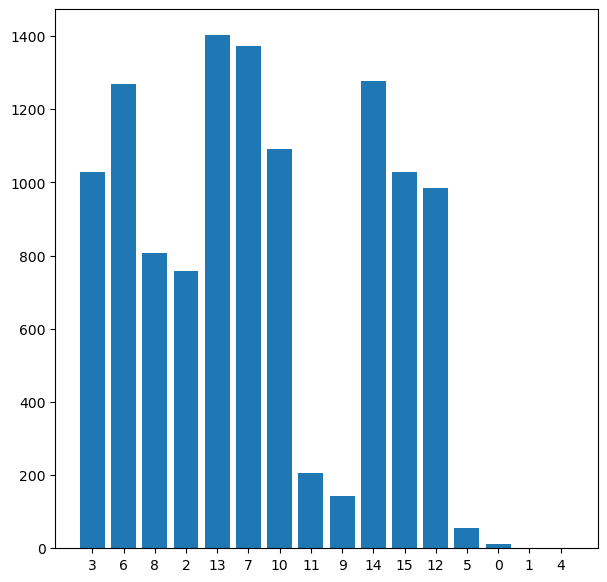

In [128]:
cluster_k=[2,3,4,5,6,7,16]
categorical_indices=list(range(health_exam_df_standardized.shape[1],health_exam_df_standardized.shape[1]+np.array(df_categorical).shape[1]))

for one_k in cluster_k:
  kproto=KPrototypes(n_clusters=one_k,init='Cao',n_jobs=4,verbose=0,random_state=SEED)
  clusters=kproto.fit_predict(merged_array,categorical=categorical_indices)
  clustering_dict=Counter(clusters)
  
  fig,ax=plt.subplots(1,1,figsize=(7,7))
  ax.bar([str(one) for one in clustering_dict.keys()],clustering_dict.values())

# 클러스터링 시각화 목적으로 데이터를 2차원으로 차원 축소후 클러스터링 수행
# 해석주의 : 차원 축소를 하면 데이터 패턴에 손실이 있게 됨. 따라서 실제 클러스터링의 결과는 차원 축소 하지 않고 했을 때가 더 정확함

In [129]:
# PCA 하기전에 standardization 필요: https://stats.stackexchange.com/a/69159

pca=PCA(n_components=2)
pca.fit(merged_array)
merged_array_2dpca=pca.transform(merged_array)
merged_array_2dpca

array([[-2.22964859,  0.63393606],
       [ 0.57001031,  1.62685316],
       [-2.52880968,  2.23019716],
       ...,
       [ 2.69016447,  0.01966437],
       [-2.16409115, -0.72601508],
       [-1.39806528, -0.53997884]])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


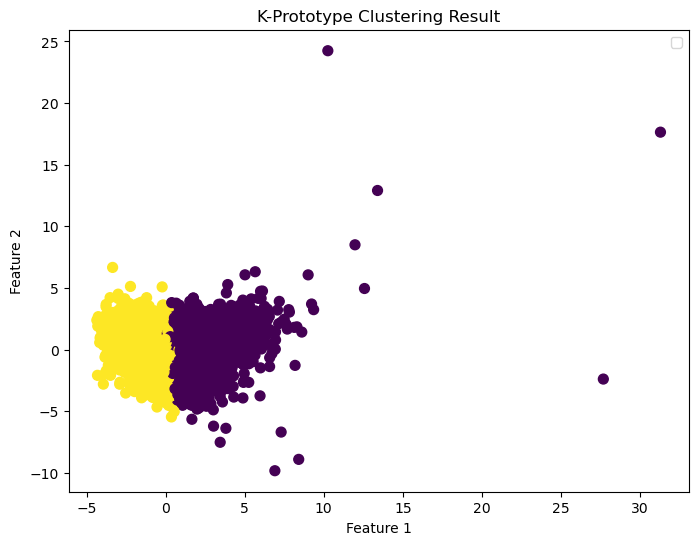

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


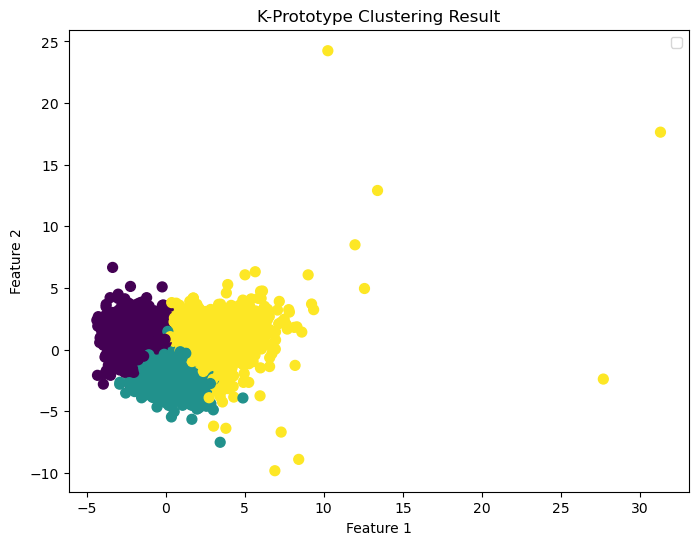

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


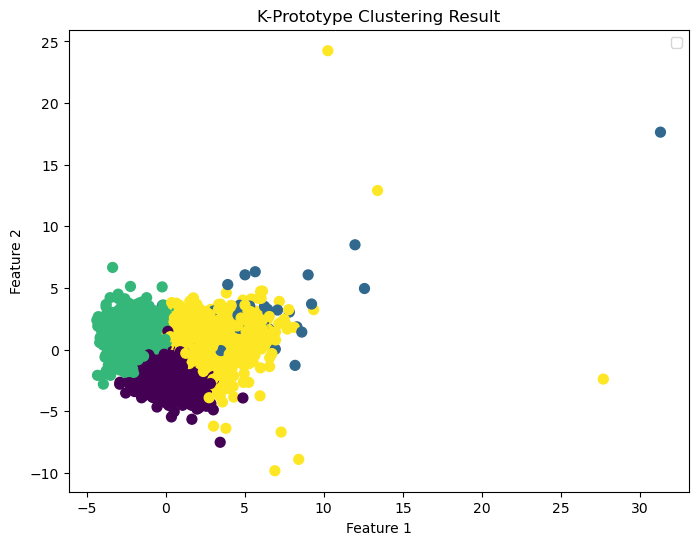

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


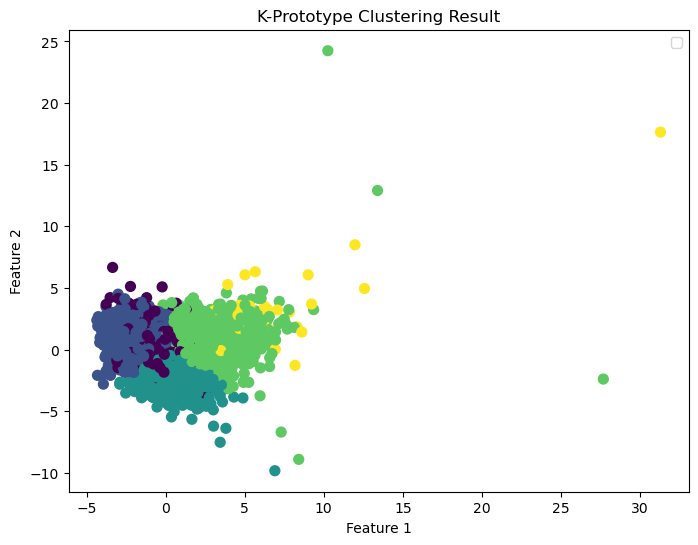

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


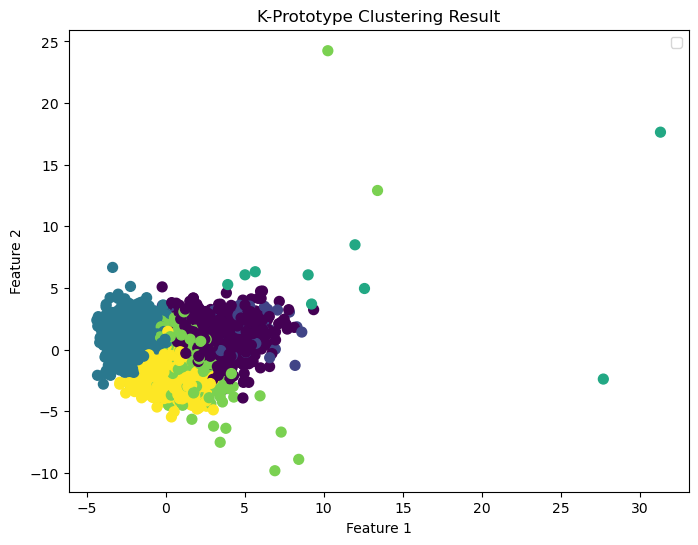

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


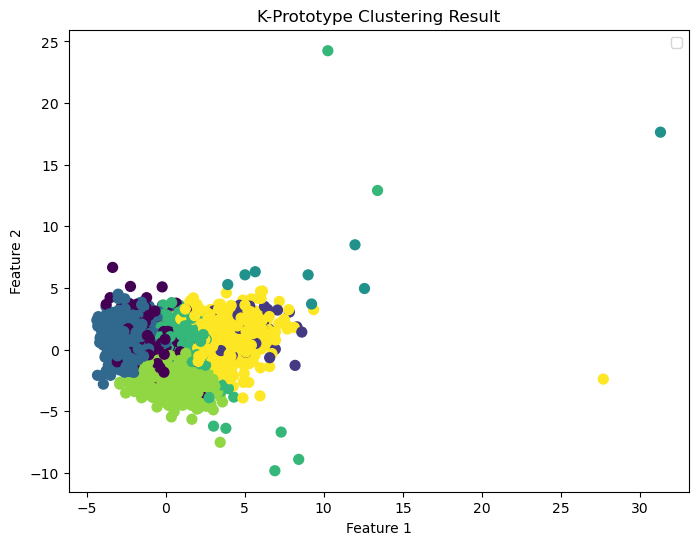

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


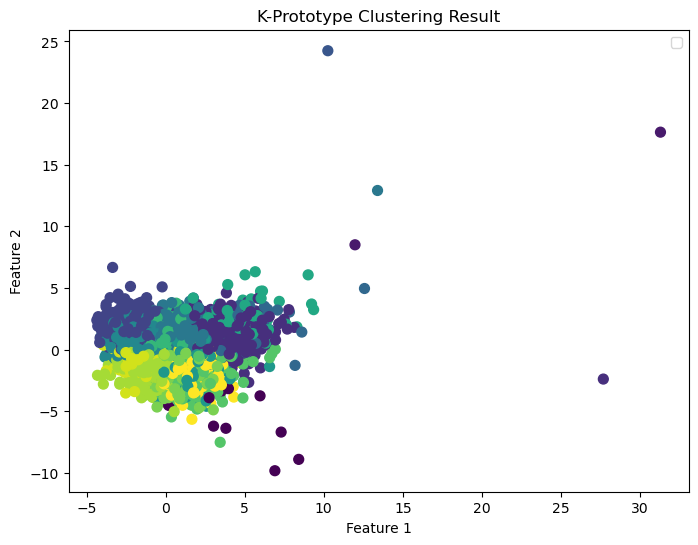

In [176]:
cluster_k=[2,3,4,5,6,7,16]

for one_k in cluster_k:
  kproto=KPrototypes(n_clusters=one_k,init='Cao',n_jobs=4,verbose=0,random_state=SEED)
  labels=kproto.fit_predict(merged_array,categorical=categorical_indices)
  # centroids=kproto.cluster_centroids_
  clustering_dict=Counter(labels)
  
  plt.figure(figsize=(8, 6))
  # Scatter plot the data points
  plt.scatter(merged_array_2dpca[:, 0],merged_array_2dpca[:, 1],c=labels,s=50,cmap='viridis')
  # Plot the centroids
  # plt.scatter(centroids[:, 0],centroids[:, 1],s=200,c='red',marker='X',label='Centroids')
  plt.xlabel('Feature 1')
  plt.ylabel('Feature 2')
  plt.title('K-Prototype Clustering Result')
  plt.legend()
  plt.show()

# 훈련 데이터에 포함되지 않은 특정 테스트 샘플이 어떤 클러스터에 속하는지 예측

In [133]:
pd.set_option('display.float_format','{:.2f}'.format)
random_sample=joint_data_w_imputation.iloc[10,:].to_frame().T[required_numerical_variables+required_categorical_variables]
random_sample

,age,alt,ast,creatinine,e_gfr,fasting_glucose,gamma_gtp,hemoglobin,bmi,diastolic_blood_pressure,height,systolic_blood_pressure,waist_circumference,weight,gender,now_drug_treatment,past_disease_history,urine_protein
10,42.00,97.00,60.00,0.90,92.00,74.00,91.00,16.90,38.00,91.00,169.90,129.00,107.00,109.60,0.00,0.00,0.00,0.00


In [136]:
print(random_sample[required_numerical_variables].columns)
print(list(random_sample[required_numerical_variables].values))

Index(['age', 'alt', 'ast', 'creatinine', 'e_gfr', 'fasting_glucose',
       'gamma_gtp', 'hemoglobin', 'bmi', 'diastolic_blood_pressure', 'height',
       'systolic_blood_pressure', 'waist_circumference', 'weight'],
      dtype='object')
[array([ 42. ,  97. ,  60. ,   0.9,  92. ,  74. ,  91. ,  16.9,  38. ,
        91. , 169.9, 129. , 107. , 109.6])]


In [139]:
keys_of_one_numerical=['age', 'alt', 'ast', 'creatinine', 'e_gfr', 'fasting_glucose',
       'gamma_gtp', 'hemoglobin', 'bmi', 'diastolic_blood_pressure', 'height',
       'systolic_blood_pressure', 'waist_circumference', 'weight']
values_of_one_numerical=[32,17,10,1.9,62,84,11,13.9,18,95,165.9,119,77,79.6]

dict_of_one_numerical=dict(zip(keys_of_one_numerical,values_of_one_numerical))
df_of_one_numerical=pd.DataFrame(dict_of_one_numerical,index=[0])
display(df_of_one_numerical);print()

# 정규화
df_of_one_numerical_standardized=standard_scaler.transform(df_of_one_numerical)
display(df_of_one_numerical_standardized);print()

# ================================================================================
keys_of_one_categorical=required_categorical_variables
values_of_one_categorical=[0,1,1,1]

dict_of_one_categorical=dict(zip(keys_of_one_categorical,values_of_one_categorical))
df_of_one_categorical=pd.DataFrame(dict_of_one_categorical,index=[0])
display(df_of_one_categorical);print()

# ================================================================================
merged_one_array=np.hstack((df_of_one_numerical_standardized,np.array(df_of_one_categorical)))
display(merged_one_array)

,age,alt,ast,creatinine,e_gfr,fasting_glucose,gamma_gtp,hemoglobin,bmi,diastolic_blood_pressure,height,systolic_blood_pressure,waist_circumference,weight
0,32,17,10,1.90,62,84,11,13.90,18,95,165.90,119,77,79.60


array([[-1.37563366, -0.31887012, -0.59254815,  4.46459085, -1.25198796,
        -0.66683814, -0.41672266, -0.09705663, -1.66404349,  1.82593083,
         0.30524227, -0.19139174, -0.20440795,  1.33789056]])

,gender,now_drug_treatment,past_disease_history,urine_protein
0,0,1,1,1


array([[-1.37563366, -0.31887012, -0.59254815,  4.46459085, -1.25198796,
        -0.66683814, -0.41672266, -0.09705663, -1.66404349,  1.82593083,
         0.30524227, -0.19139174, -0.20440795,  1.33789056,  0.        ,
         1.        ,  1.        ,  1.        ]])

위의 테스트 데이터는 전체 16개의 클러스터 중 15번 클러스터에 속함


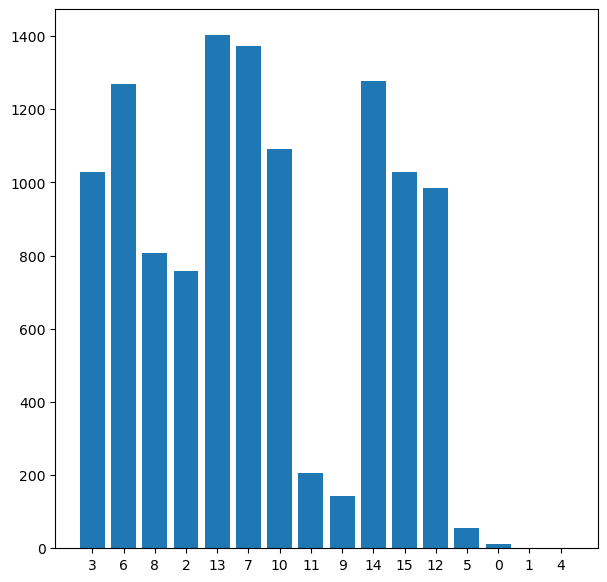

In [156]:
cluster_k=[16]
categorical_indices=list(range(health_exam_df_standardized.shape[1],health_exam_df_standardized.shape[1]+np.array(df_categorical).shape[1]))

for one_k in cluster_k:

  kproto=KPrototypes(n_clusters=one_k,init='Cao',n_jobs=4,verbose=0,random_state=SEED)
  kproto.fit(merged_array,categorical=categorical_indices)
  predicted_for_one=kproto.predict(merged_one_array,categorical=categorical_indices)
  # print('predicted_for_one',predicted_for_one)
  # [1]

  labels=kproto.fit_predict(merged_array,categorical=categorical_indices)
  clustering_dict=Counter(labels)
  
  fig,ax=plt.subplots(1,1,figsize=(7,7))
  ax.bar([str(one)for one in clustering_dict.keys()],clustering_dict.values())
  
  print("위의 테스트 데이터는 전체 {}개의 클러스터 중 {}번 클러스터에 속함".format(cluster_k[0],predicted_for_one[0]))

# 4개 클러스터 각각에 속하는 무작위 샘플들 10건씩 표시 (각 클러스터 별 데이터 특성 분석)

In [157]:
df_integrative['cluster']=labels
df_integrative

/tmp/ipykernel_5878/2524210239.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrative['cluster']=labels


,age,alt,ast,creatinine,e_gfr,fasting_glucose,gamma_gtp,hemoglobin,bmi,diastolic_blood_pressure,height,systolic_blood_pressure,waist_circumference,weight,gender,now_drug_treatment,past_disease_history,urine_protein,cluster
0,40.00,19,31,0.60,110,80.00,27.00,12.60,18.60,87,156.50,124,64.00,45.50,1,0,0,0,3
1,52.00,22,26,0.70,118,103.00,28.00,14.60,24.00,75,180.70,118,80.00,78.30,0,0,0,0,6
2,30.00,11,24,0.50,144,82.00,16.00,11.50,23.20,54,160.40,110,77.00,59.70,1,0,0,0,3
3,38.00,35,38,0.50,138,73.00,27.00,13.20,23.40,105,160.80,150,78.00,60.40,1,0,0,0,8
4,46.00,66,52,1.00,80,99.00,43.00,15.80,27.50,98,175.50,146,94.00,84.70,0,1,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23034,58.00,17,13,1.10,54,80.00,20.00,15.30,24.00,100,153.30,171,74.00,56.30,1,1,1,1,8
23035,50.00,11,10,1.10,55,83.00,13.00,13.40,21.00,63,157.60,101,77.00,52.20,1,0,0,0,14
23036,50.00,32,14,1.20,68,91.00,12.00,16.70,26.90,90,174.40,140,85.00,81.90,0,0,0,0,2
23037,56.00,16,20,0.80,78,98.00,13.00,14.80,19.10,55,156.70,125,67.00,47.00,1,0,0,0,14


In [163]:
new_cluster_info=df_integrative['cluster'].value_counts().to_frame().reset_index().reset_index()
new_cluster_info

,index,cluster,count
0,0,13,1403
1,1,7,1374
2,2,14,1278
3,3,6,1269
4,4,10,1092
5,5,3,1029
6,6,15,1029
7,7,12,984
8,8,8,807
9,9,2,758


In [164]:
new_cluster_dictionary=dict(zip(list(new_cluster_info['cluster']),list(new_cluster_info['index'])))

In [165]:
df_integrative['cluster'].replace(new_cluster_dictionary,inplace=True)

/tmp/ipykernel_5878/1731097772.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrative['cluster'].replace(new_cluster_dictionary,inplace=True)


In [167]:
new_cluster_info=df_integrative['cluster'].value_counts()
new_cluster_info

cluster
0     1403
1     1374
2     1278
3     1269
4     1092
5     1029
6     1029
7      984
8      807
9      758
10     207
11     144
12      55
13      12
14       2
15       1
Name: count, dtype: int64

In [168]:
with open('./result_pickle/NHID_clustering-Copy_blink/df_integrative_{}.pkl'.format(cluster_k[0]),'wb') as f:
  pickle.dump(df_integrative,f)

In [175]:
cluster_labels=df_integrative['cluster'].unique()
cluster_labels.sort()
for one_cluster in cluster_labels:
  selected_by_cluster=df_integrative[df_integrative['cluster']==one_cluster]
  sampled_df=selected_by_cluster.sample(n=10,random_state=SEED)
  print("10건의 무작위 샘플 from 클러스터 {} :".format(one_cluster))
  display(sampled_df);print()

10건의 무작위 샘플 from 클러스터 0 :


,age,alt,ast,creatinine,e_gfr,fasting_glucose,gamma_gtp,hemoglobin,bmi,diastolic_blood_pressure,height,systolic_blood_pressure,waist_circumference,weight,gender,now_drug_treatment,past_disease_history,urine_protein,cluster
13091,54.00,21,29,1.00,61,97.00,19.00,13.30,21.80,83,159.80,122,77.00,55.60,1,0,1,0,0
7143,76.00,14,21,0.60,103,94.00,12.00,13.50,20.60,75,146.00,125,73.00,44.00,1,1,1,0,0
4878,63.00,21,31,0.70,84,93.00,20.00,13.40,21.00,74,152.90,117,71.00,49.00,1,1,1,0,0
12311,62.00,22,38,1.00,80,119.00,191.00,17.00,19.30,91,150.70,126,70.00,43.90,0,0,0,2,0
20896,70.00,51,82,0.50,129,92.00,156.00,12.60,22.90,78,147.20,131,80.00,49.70,1,1,1,0,0
9506,65.00,30,52,0.50,132,117.00,38.00,13.50,21.40,84,155.70,126,66.00,52.00,1,0,0,0,0
11280,58.00,20,24,0.80,105,98.00,16.00,14.10,20.20,81,166.70,136,72.00,56.00,0,0,0,0,0
11418,56.00,16,19,0.90,65,93.00,11.00,14.50,22.50,78,154.20,132,71.00,53.40,1,0,0,0,0
14525,62.00,17,40,1.40,55,115.00,137.00,7.70,19.90,61,161.80,152,82.00,52.20,0,1,1,2,0
5303,68.00,25,27,0.80,71,129.00,10.00,12.00,20.80,77,147.60,136,75.00,45.40,1,1,1,0,0



10건의 무작위 샘플 from 클러스터 1 :


,age,alt,ast,creatinine,e_gfr,fasting_glucose,gamma_gtp,hemoglobin,bmi,diastolic_blood_pressure,height,systolic_blood_pressure,waist_circumference,weight,gender,now_drug_treatment,past_disease_history,urine_protein,cluster
16708,46.00,10,15,0.60,99,102.00,11.00,11.20,18.70,63,165.30,104,69.00,51.20,1,0,0,0,1
21940,21.00,10,18,0.80,96,89.00,11.00,13.70,16.30,65,166.20,100,61.00,44.90,1,0,0,0,1
13291,44.00,28,21,1.10,77,105.00,42.00,14.30,20.20,64,172.10,104,73.00,59.70,0,0,0,0,1
537,52.00,17,26,0.60,105,97.00,10.00,13.20,16.20,63,155.40,101,62.00,39.20,1,1,0,0,1
4354,44.00,16,25,0.80,82,96.00,38.00,14.70,21.00,74,150.70,106,69.00,47.60,1,0,0,0,1
11222,36.00,21,23,0.80,81,93.00,7.00,15.50,21.70,88,164.50,125,67.00,58.70,1,0,0,0,1
2968,39.00,15,15,0.80,84,107.00,12.00,14.00,20.00,78,154.10,117,61.00,47.40,1,0,0,0,1
14732,38.00,58,45,0.90,74,87.00,23.00,13.90,18.10,69,163.00,113,68.00,48.00,1,0,0,1,1
22091,28.00,14,25,0.90,79,69.00,19.00,13.40,15.80,71,156.10,89,57.00,38.40,1,0,0,1,1
18348,32.00,31,23,0.90,77,90.00,12.00,13.40,23.70,72,153.10,104,73.00,55.60,1,0,0,1,1



10건의 무작위 샘플 from 클러스터 2 :


,age,alt,ast,creatinine,e_gfr,fasting_glucose,gamma_gtp,hemoglobin,bmi,diastolic_blood_pressure,height,systolic_blood_pressure,waist_circumference,weight,gender,now_drug_treatment,past_disease_history,urine_protein,cluster
2732,52.00,15,25,0.80,75,119.00,13.00,14.60,22.30,59,162.90,98,75.00,59.10,1,0,1,0,2
16289,58.00,19,19,1.10,73,100.00,16.00,14.90,21.40,69,170.90,116,75.00,62.50,0,0,0,0,2
10509,56.00,15,23,1.10,73,104.00,16.00,14.00,20.80,70,171.80,105,68.00,61.50,0,1,1,0,2
13595,52.00,28,23,0.90,65,99.00,15.00,12.70,21.70,71,166.00,126,68.00,59.80,1,0,0,0,2
1035,62.00,15,20,0.80,72,100.00,11.00,12.00,24.10,66,155.30,104,71.00,58.10,1,0,1,0,2
17396,60.00,24,30,0.70,90,81.00,28.00,14.00,24.10,58,153.40,121,79.00,56.60,1,0,0,0,2
12767,54.00,22,26,1.20,49,123.00,29.00,12.40,23.50,70,153.00,110,77.00,55.00,1,0,0,2,2
21991,52.00,19,24,0.80,75,90.00,11.00,12.60,20.50,65,167.40,111,70.00,57.40,1,0,1,0,2
6002,50.00,17,19,0.70,94,89.00,18.00,14.90,27.00,67,161.10,92,73.00,70.00,1,0,0,0,2
13627,38.00,17,20,0.70,93,104.00,21.00,12.80,23.10,62,161.40,101,82.00,60.30,1,0,0,0,2



10건의 무작위 샘플 from 클러스터 3 :


,age,alt,ast,creatinine,e_gfr,fasting_glucose,gamma_gtp,hemoglobin,bmi,diastolic_blood_pressure,height,systolic_blood_pressure,waist_circumference,weight,gender,now_drug_treatment,past_disease_history,urine_protein,cluster
16297,44.00,36,19,1.00,86,95.00,32.00,15.20,21.00,82,172.90,108,81.50,62.70,0,0,0,0,3
8275,32.00,33,29,0.80,119,89.00,40.00,17.90,27.60,82,176.10,114,93.00,85.60,0,0,0,0,3
15496,54.00,17,20,0.90,93,110.00,21.00,16.30,22.70,80,168.00,125,79.00,64.00,0,0,0,0,3
27,38.00,22,30,0.90,94,74.00,41.00,16.70,24.50,88,175.80,138,92.00,75.80,0,0,0,0,3
21381,58.00,11,15,0.90,92,99.00,15.00,13.80,20.10,80,181.40,120,81.00,66.00,0,1,1,0,3
18657,52.00,37,39,0.90,94,108.00,94.00,16.40,21.60,77,171.70,118,82.00,63.60,0,0,0,0,3
21106,20.00,43,27,1.10,90,100.00,24.00,15.80,21.10,87,175.10,125,72.00,64.80,0,0,0,0,3
12070,40.00,52,38,1.00,87,96.00,25.00,15.40,21.70,69,175.10,114,77.00,66.60,0,0,1,0,3
8304,24.00,17,17,1.00,98,104.00,24.00,16.80,21.60,67,167.20,101,77.00,60.50,0,0,0,0,3
13310,54.00,19,27,0.80,107,73.00,21.00,15.30,23.80,79,170.80,123,81.50,69.40,0,0,1,0,3



10건의 무작위 샘플 from 클러스터 4 :


,age,alt,ast,creatinine,e_gfr,fasting_glucose,gamma_gtp,hemoglobin,bmi,diastolic_blood_pressure,height,systolic_blood_pressure,waist_circumference,weight,gender,now_drug_treatment,past_disease_history,urine_protein,cluster
17668,56.00,11,20,0.60,110,96.00,12.00,13.40,25.30,79,157.70,116,70.00,62.90,1,0,0,0,4
17166,52.00,18,19,0.60,150,119.00,16.00,15.20,24.40,92,174.00,130,80.00,73.90,0,0,0,0,4
17222,52.00,12,15,0.50,129,97.00,16.00,14.10,30.50,84,168.10,127,85.00,86.30,1,0,0,0,4
21338,58.00,23,27,0.70,85,73.00,18.00,14.00,28.30,72,158.90,133,85.00,71.40,1,0,0,0,4
12745,58.00,20,19,0.50,118,105.00,15.00,13.80,23.90,61,156.10,124,78.00,58.20,1,1,1,0,4
730,41.00,16,15,0.80,79,108.00,29.00,12.90,25.70,75,168.50,125,88.00,73.10,1,0,0,0,4
5357,60.00,17,22,0.60,108,86.00,27.00,13.80,26.40,81,151.70,139,85.00,60.70,1,0,0,1,4
10347,62.00,20,31,0.50,125,83.00,14.00,13.10,23.40,70,156.70,126,76.00,57.40,1,0,0,0,4
9732,55.00,16,30,0.70,92,95.00,17.00,14.90,26.10,60,167.60,105,84.00,73.20,1,0,0,0,4
10315,44.00,17,21,0.60,108,77.00,13.00,13.50,23.50,80,157.00,130,74.00,58.00,1,1,1,0,4



10건의 무작위 샘플 from 클러스터 5 :


,age,alt,ast,creatinine,e_gfr,fasting_glucose,gamma_gtp,hemoglobin,bmi,diastolic_blood_pressure,height,systolic_blood_pressure,waist_circumference,weight,gender,now_drug_treatment,past_disease_history,urine_protein,cluster
17975,44.00,16,20,0.60,115,94.00,12.00,12.30,21.00,63,169.90,112,80.00,60.70,1,0,0,0,5
13994,58.00,14,28,0.50,135,93.00,17.00,12.50,20.40,71,165.60,119,67.00,56.00,1,0,0,0,5
4738,40.00,10,22,0.60,117,89.00,14.00,12.50,19.60,72,156.30,121,64.00,48.00,1,0,0,0,5
14209,50.00,18,24,0.60,112,97.00,27.00,14.10,20.60,72,151.40,114,68.00,47.30,1,0,0,0,5
15851,40.00,20,34,0.60,111,91.00,6.00,12.90,21.70,67,164.30,109,68.00,58.50,1,0,1,0,5
2884,46.00,16,18,0.50,141,102.00,27.00,12.80,23.50,81,153.20,118,79.00,55.20,1,0,0,0,5
11306,54.00,14,22,0.60,110,87.00,8.00,12.80,21.40,80,153.00,120,77.00,50.00,1,0,0,2,5
6711,44.00,22,21,0.60,115,93.00,21.00,14.10,20.40,65,153.20,108,67.00,47.90,1,0,0,0,5
2,30.00,11,24,0.50,144,82.00,16.00,11.50,23.20,54,160.40,110,77.00,59.70,1,0,0,0,5
422,40.00,19,18,0.60,111,88.00,13.00,10.90,19.50,58,164.60,101,66.00,52.80,1,0,0,0,5



10건의 무작위 샘플 from 클러스터 6 :


,age,alt,ast,creatinine,e_gfr,fasting_glucose,gamma_gtp,hemoglobin,bmi,diastolic_blood_pressure,height,systolic_blood_pressure,waist_circumference,weight,gender,now_drug_treatment,past_disease_history,urine_protein,cluster
17749,58.00,14,24,1.10,54,99.00,18.00,12.60,23.80,75,164.00,121,85.50,64.00,1,0,0,0,6
13801,67.00,47,37,1.50,49,94.00,94.00,14.50,21.70,66,163.60,128,79.00,58.00,0,1,1,2,6
5722,73.00,23,27,1.00,77,91.00,32.00,15.80,27.10,67,167.80,127,99.00,76.20,0,0,1,0,6
13915,52.00,19,29,1.10,74,96.00,23.00,14.50,25.80,68,164.70,119,78.00,70.10,0,1,1,0,6
15698,56.00,20,21,0.90,87,125.00,26.00,14.10,23.60,76,167.70,115,86.50,66.50,0,0,0,0,6
3526,55.00,21,32,1.20,66,87.00,28.00,14.80,23.40,75,175.60,112,89.00,72.30,0,0,0,0,6
11698,56.00,12,19,1.00,82,102.00,27.00,14.10,24.30,80,162.00,130,84.00,63.80,0,1,1,0,6
7753,61.00,17,20,1.10,72,123.00,21.00,14.10,23.30,77,170.80,126,87.00,68.00,0,1,1,0,6
62,68.00,27,32,0.90,83,97.00,57.00,16.40,25.60,75,162.90,113,88.00,68.00,0,1,1,0,6
1369,68.00,18,29,1.20,63,89.00,33.00,14.90,29.80,80,171.00,120,100.00,87.00,0,1,1,0,6



10건의 무작위 샘플 from 클러스터 7 :


,age,alt,ast,creatinine,e_gfr,fasting_glucose,gamma_gtp,hemoglobin,bmi,diastolic_blood_pressure,height,systolic_blood_pressure,waist_circumference,weight,gender,now_drug_treatment,past_disease_history,urine_protein,cluster
8287,70.00,29,26,1.20,47,132.00,52.00,13.70,30.50,74,152.20,143,94.00,70.60,1,0,1,1,7
14528,62.00,30,30,0.80,73,115.00,20.00,14.50,25.30,79,162.10,129,83.00,66.40,1,0,0,0,7
1375,84.00,20,19,0.90,63,120.00,18.00,13.60,25.80,70,155.00,110,85.00,62.00,1,1,1,0,7
16244,66.00,41,47,1.00,58,99.00,47.00,11.50,25.80,80,161.50,132,79.00,67.30,1,1,1,0,7
22187,76.00,22,24,0.60,103,123.00,13.00,13.80,25.10,76,154.50,131,79.00,59.90,1,1,1,0,7
10524,70.00,18,20,0.70,83,92.00,20.00,14.70,26.90,79,153.30,141,94.00,63.30,1,1,1,2,7
12961,84.00,15,27,1.10,50,128.00,16.00,9.00,25.10,80,152.00,130,83.00,58.00,1,1,1,0,7
20482,70.00,10,19,0.70,87,96.00,17.00,12.30,25.40,68,154.40,122,87.00,60.60,1,1,1,0,7
14412,76.00,28,35,0.60,96,100.00,17.00,13.00,23.20,72,164.40,136,88.50,62.60,1,0,0,0,7
14204,74.00,17,16,0.60,104,105.00,22.00,14.90,25.40,70,154.80,117,83.00,60.80,1,1,1,0,7



10건의 무작위 샘플 from 클러스터 8 :


,age,alt,ast,creatinine,e_gfr,fasting_glucose,gamma_gtp,hemoglobin,bmi,diastolic_blood_pressure,height,systolic_blood_pressure,waist_circumference,weight,gender,now_drug_treatment,past_disease_history,urine_protein,cluster
11948,42.00,19,28,0.50,135,88.00,36.00,12.90,21.70,102,154.80,134,73.00,52.10,1,0,0,0,8
14138,66.00,18,21,0.70,84,97.00,14.00,13.00,26.10,90,154.60,139,84.00,62.40,1,0,0,1,8
8521,57.00,23,40,0.50,135,75.00,10.00,13.00,22.90,90,156.00,140,71.00,55.70,1,1,1,0,8
278,47.00,25,18,0.70,128,96.00,88.00,13.80,24.10,101,169.50,132,82.00,69.20,0,0,0,0,8
14387,58.00,21,19,0.80,78,116.00,21.00,14.40,25.50,83,148.10,149,79.00,56.00,1,0,0,0,8
7082,67.00,84,106,0.80,102,97.00,34.00,16.90,21.30,98,171.50,169,85.00,62.70,0,0,0,0,8
22861,44.00,25,22,0.90,72,118.00,42.00,13.30,28.80,99,157.80,156,85.00,71.80,1,0,0,0,8
19448,42.00,94,94,0.90,73,99.00,56.00,10.90,24.70,99,158.50,151,82.00,62.00,1,0,0,0,8
20734,65.00,22,32,0.60,100,86.00,27.00,13.20,23.10,96,157.20,163,78.00,57.00,1,1,1,0,8
761,58.00,23,19,0.80,99,102.00,23.00,14.70,25.30,98,174.60,139,88.00,77.00,0,1,0,0,8



10건의 무작위 샘플 from 클러스터 9 :


,age,alt,ast,creatinine,e_gfr,fasting_glucose,gamma_gtp,hemoglobin,bmi,diastolic_blood_pressure,height,systolic_blood_pressure,waist_circumference,weight,gender,now_drug_treatment,past_disease_history,urine_protein,cluster
17487,42.00,52,52,1.00,84,103.00,86.00,15.90,26.10,80,181.00,118,90.00,85.40,0,0,1,2,9
14449,55.00,33,40,0.90,93,101.00,72.00,14.90,26.10,90,176.10,150,84.50,80.80,0,0,0,0,9
12101,52.00,57,48,0.80,108,88.00,84.00,15.60,28.30,89,168.00,128,92.00,79.90,0,0,0,0,9
3516,46.00,40,45,0.70,129,93.00,231.00,16.00,27.30,92,170.80,135,97.00,79.70,0,0,0,0,9
16145,46.00,40,23,1.00,86,109.00,120.00,15.60,26.70,89,172.50,128,88.00,79.40,0,1,1,1,9
1942,38.00,83,40,0.80,80,95.00,87.00,14.10,31.80,82,154.80,133,77.00,76.20,1,1,1,0,9
12202,68.00,23,45,0.80,102,159.00,90.00,15.50,30.70,89,167.90,122,98.00,86.50,0,0,0,0,9
766,34.00,23,24,0.80,82,102.00,32.00,14.40,34.50,122,157.90,171,96.00,85.90,1,1,0,0,9
8047,50.00,42,27,1.10,75,89.00,25.00,16.00,26.50,87,179.00,137,94.00,85.00,0,0,0,0,9
18572,44.00,39,22,0.70,123,139.00,59.00,15.60,32.00,75,167.40,120,98.00,89.80,0,1,1,0,9



10건의 무작위 샘플 from 클러스터 10 :


,age,alt,ast,creatinine,e_gfr,fasting_glucose,gamma_gtp,hemoglobin,bmi,diastolic_blood_pressure,height,systolic_blood_pressure,waist_circumference,weight,gender,now_drug_treatment,past_disease_history,urine_protein,cluster
2619,65.00,26,23,0.90,90,166.00,23.00,14.70,22.70,60,168.10,110,87.00,64.20,0,0,0,0,10
11885,40.00,170,190,0.80,114,355.00,175.00,17.10,27.40,98,164.50,140,86.00,74.10,0,0,1,2,10
4723,70.00,32,34,1.00,78,175.00,268.00,15.30,20.90,74,168.20,127,77.00,59.10,0,1,1,0,10
1403,58.00,26,25,1.00,56,263.00,16.00,15.30,21.20,66,158.70,107,73.00,53.50,1,1,1,0,10
20035,68.00,138,86,0.80,76,218.00,43.00,13.10,22.80,64,152.00,119,75.00,52.60,1,1,1,0,10
12096,58.00,39,44,0.50,135,214.00,17.00,12.70,30.00,71,162.40,128,91.00,79.00,1,1,1,0,10
15395,56.00,27,26,0.70,92,167.00,22.00,14.80,24.50,74,151.20,132,84.00,56.00,1,1,1,0,10
15989,74.00,33,21,0.90,87,168.00,28.00,16.20,25.90,80,164.50,120,96.00,70.00,0,1,1,0,10
13010,54.00,19,26,0.70,87,167.00,40.00,14.30,28.00,74,159.00,128,92.00,70.90,1,1,1,1,10
17118,44.00,73,35,0.80,101,216.00,82.00,17.70,29.80,101,165.70,159,89.00,81.70,0,1,1,2,10



10건의 무작위 샘플 from 클러스터 11 :


,age,alt,ast,creatinine,e_gfr,fasting_glucose,gamma_gtp,hemoglobin,bmi,diastolic_blood_pressure,height,systolic_blood_pressure,waist_circumference,weight,gender,now_drug_treatment,past_disease_history,urine_protein,cluster
1880,26.00,116,97,0.70,144,79.00,37.00,15.10,30.40,91,168.40,139,87.00,86.20,0,0,0,0,11
17493,42.00,71,134,0.90,92,107.00,58.00,16.00,27.20,85,175.90,127,92.00,84.30,0,0,0,0,11
18318,47.00,88,274,0.90,96,96.00,35.00,16.30,25.70,84,170.40,129,90.00,74.50,0,0,0,0,11
5712,76.00,273,278,0.80,74,85.00,63.00,11.90,31.70,84,155.70,138,96.00,76.90,1,1,1,2,11
19734,42.00,78,141,1.30,64,105.00,35.00,14.90,26.20,76,180.20,122,91.50,85.00,0,0,0,0,11
21101,38.00,130,56,1.00,88,104.00,87.00,14.60,26.70,79,170.10,119,90.00,77.20,0,0,0,0,11
13013,35.00,128,49,1.30,67,94.00,56.00,14.50,28.40,80,183.20,135,84.00,95.30,0,0,0,0,11
4463,32.00,161,94,1.00,92,108.00,132.00,16.30,33.30,65,195.50,130,112.00,127.10,0,0,1,2,11
21516,54.00,129,104,0.70,93,96.00,280.00,11.90,27.20,79,162.50,114,86.00,71.70,1,1,1,0,11
3780,35.00,133,52,0.70,95,96.00,53.00,12.90,27.70,73,165.00,114,84.00,75.50,1,0,0,1,11



10건의 무작위 샘플 from 클러스터 12 :


,age,alt,ast,creatinine,e_gfr,fasting_glucose,gamma_gtp,hemoglobin,bmi,diastolic_blood_pressure,height,systolic_blood_pressure,waist_circumference,weight,gender,now_drug_treatment,past_disease_history,urine_protein,cluster
19542,54.00,162,233,0.80,107,290.00,999.00,16.60,21.70,91,165.00,139,87.00,59.00,0,1,1,2,12
15402,45.00,24,53,1.30,63,197.00,774.00,12.90,28.60,117,164.90,197,97.00,77.80,0,0,0,2,12
17832,58.00,175,217,1.10,73,120.00,774.00,14.50,18.60,95,166.90,153,73.00,51.90,0,0,0,2,12
14010,48.00,80,190,0.80,81,98.00,420.00,12.80,20.40,77,160.10,114,76.00,52.30,1,0,0,0,12
10916,54.00,38,35,0.80,107,107.00,421.00,16.60,23.60,83,165.40,133,88.00,64.50,0,1,1,0,12
2457,68.00,67,17,0.70,88,336.00,866.00,13.60,18.10,70,159.40,100,74.00,46.00,1,1,1,0,12
15379,45.00,39,71,1.00,85,121.00,473.00,13.70,25.70,80,173.00,120,85.00,77.00,0,1,1,0,12
18638,62.00,73,40,0.90,90,105.00,386.00,16.10,23.40,110,170.30,180,94.00,68.00,0,1,1,0,12
19842,44.00,38,59,0.90,97,117.00,522.00,16.30,22.10,63,160.50,111,85.00,57.00,0,1,1,0,12
14737,42.00,8,59,0.90,72,113.00,918.00,15.90,20.70,67,157.20,102,78.00,51.10,1,0,0,0,12



10건의 무작위 샘플 from 클러스터 13 :


,age,alt,ast,creatinine,e_gfr,fasting_glucose,gamma_gtp,hemoglobin,bmi,diastolic_blood_pressure,height,systolic_blood_pressure,waist_circumference,weight,gender,now_drug_treatment,past_disease_history,urine_protein,cluster
16024,54.00,21,27,2.70,26,91.00,20.00,12.70,24.70,77,167.10,115,89.00,68.90,0,1,1,0,13
22387,76.00,20,20,2.60,25,64.00,24.00,9.00,23.60,80,176.00,140,94.00,73.00,0,1,1,0,13
14744,56.00,40,30,8.90,6,89.00,44.00,14.30,25.00,59,164.80,98,97.00,68.00,0,1,1,0,13
20729,48.00,24,30,4.90,9,86.00,16.00,10.40,23.80,82,152.80,131,85.00,55.60,1,1,1,1,13
13108,52.00,16,23,3.30,21,102.00,19.00,13.40,33.70,95,164.90,130,100.00,91.70,0,1,1,0,13
17366,51.00,32,49,2.80,25,82.00,37.00,15.10,25.30,94,163.00,141,88.00,67.20,0,1,1,0,13
9744,78.00,18,33,7.50,8,82.00,50.00,7.90,24.40,67,162.80,146,87.00,64.70,0,1,1,2,13
17215,78.00,14,18,4.30,13,84.00,10.00,10.10,23.60,71,163.50,119,80.00,63.10,0,1,1,0,13
18864,44.00,19,42,6.10,11,74.00,28.00,12.40,22.60,111,170.10,149,100.00,65.50,0,1,1,2,13
13764,50.00,26,32,3.10,22,113.00,51.00,15.20,24.20,70,169.00,130,84.00,69.00,0,1,1,0,13


ValueError: Cannot take a larger sample than population when 'replace=False'